<a href="https://colab.research.google.com/github/kriitiika10/EDA-Project/blob/main/22BDS0304.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("indian_food.csv")
df.head()

Saving indian_food.csv to indian_food.csv


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (255, 9)


In [5]:
# Summary for numerical columns
print(df.describe())

        prep_time   cook_time
count  255.000000  255.000000
mean    31.105882   34.529412
std     72.554409   48.265650
min     -1.000000   -1.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


In [6]:
# Summary for categorical columns
print(df.describe(include='object'))

              name              ingredients        diet flavor_profile  \
count          255                      255         251            255   
unique         255                      252           2              5   
top     Balu shahi  Gram flour, ghee, sugar  vegetarian          spicy   
freq             1                        2         223            133   

             course    state region  
count           254      255    253  
unique            5       25      7  
top     main course  Gujarat   West  
freq            129       35     74  


In [7]:
#check for any duplicate values
print(df.duplicated().sum())

0


#Data Handling

In [8]:
#checking for null values
df.isnull()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
250,False,False,False,False,False,False,False,False,False
251,False,False,False,False,False,False,False,False,False
252,False,False,False,False,False,False,False,False,False
253,False,False,False,False,False,False,False,False,False


In [9]:
#number of null values per column
df.isnull().sum()

,0
name,0
ingredients,0
diet,4
prep_time,0
cook_time,0
flavor_profile,0
course,1
state,0
region,2


In [10]:
#replace -1 and '?' with NaN
df.replace(-1, np.nan, inplace=True)
df.replace('-1', np.nan, inplace=True)
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

,0
name,0
ingredients,0
diet,4
prep_time,30
cook_time,28
flavor_profile,29
course,2
state,24
region,15


In [11]:
#forward fill method to handle missing values
df.ffill(inplace=True)
df.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,0


In [12]:
#mean of numerical values
print("cook_time mean=",df['cook_time'].mean())
print("prep_time mean=",df['prep_time'].mean())

cook_time mean= 37.956862745098036
prep_time mean= 33.30980392156863


#Univariate Analysis

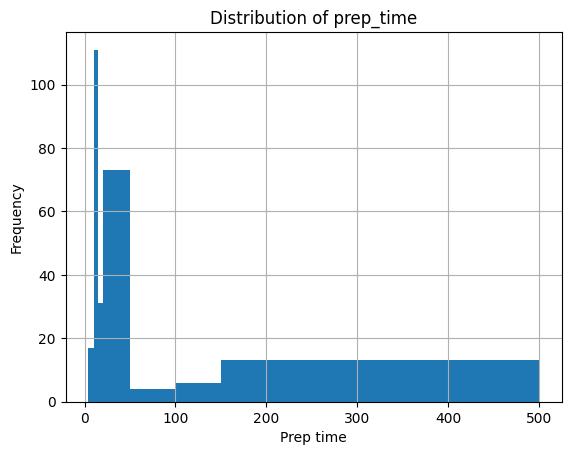

In [ ]:
bins = [4, 10, 15, 20, 50, 100, 150, 500]
df['prep_time'].hist(bins=bins)
plt.title("Distribution of prep_time")
plt.xlabel("Prep time")
plt.ylabel("Frequency")
plt.show()

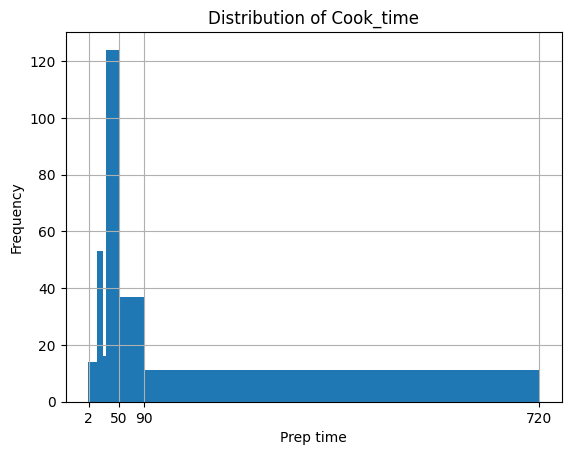

In [ ]:
bins2 = [1, 15, 25, 30, 50, 90, 720]
df['cook_time'].hist(bins=bins2)
plt.xticks([2, 50, 90, 720])
plt.title("Distribution of Cook_time")
plt.xlabel("Prep time")
plt.ylabel("Frequency")
plt.show()

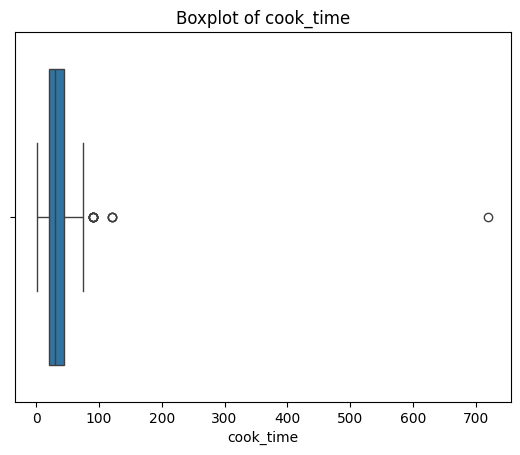

In [ ]:
sns.boxplot(x=df['cook_time'])
plt.title("Boxplot of cook_time")
plt.show()

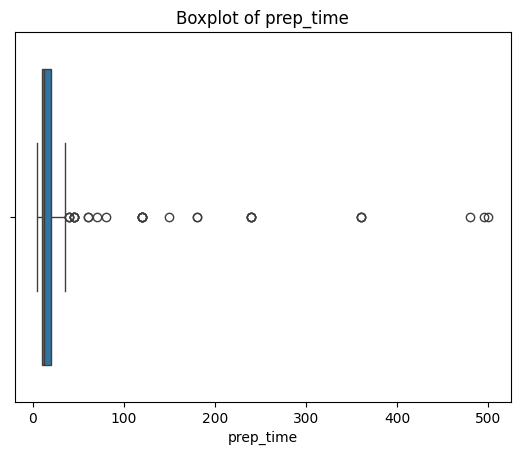

In [ ]:
sns.boxplot(x=df['prep_time'])
plt.title("Boxplot of prep_time")
plt.show()

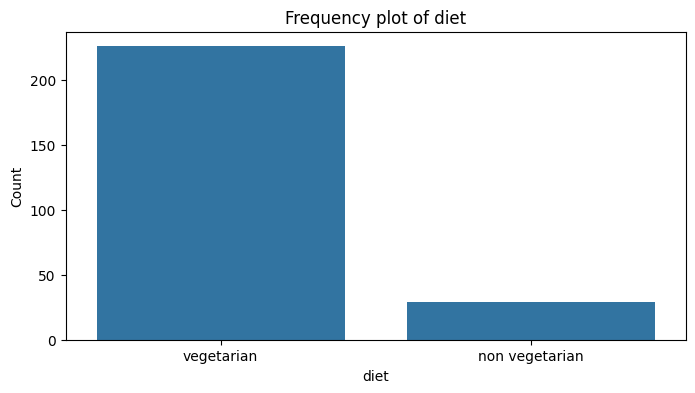

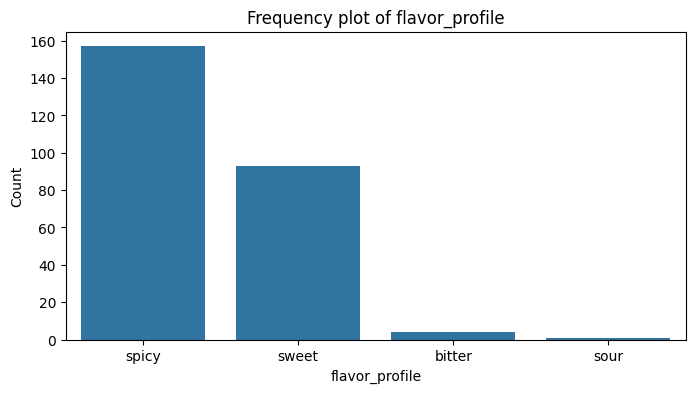

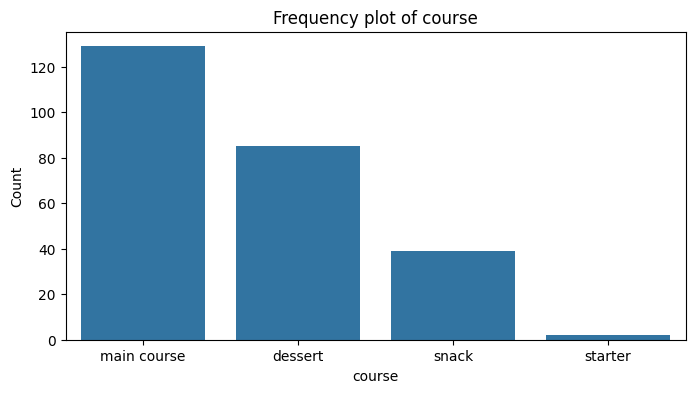

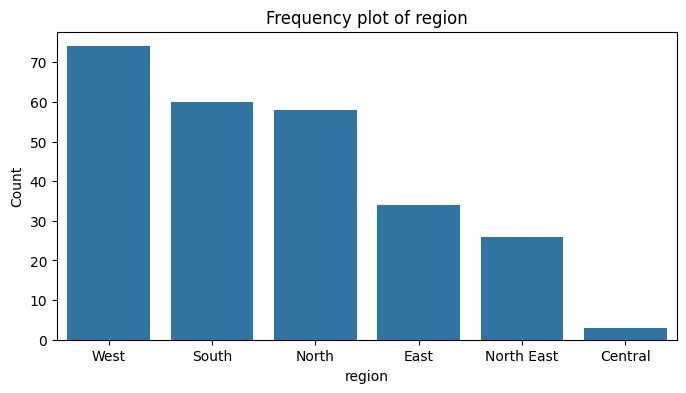

In [ ]:
#Frequency plots of all categorical columns
cat_cols = ['diet','flavor_profile','course','region']
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Frequency plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

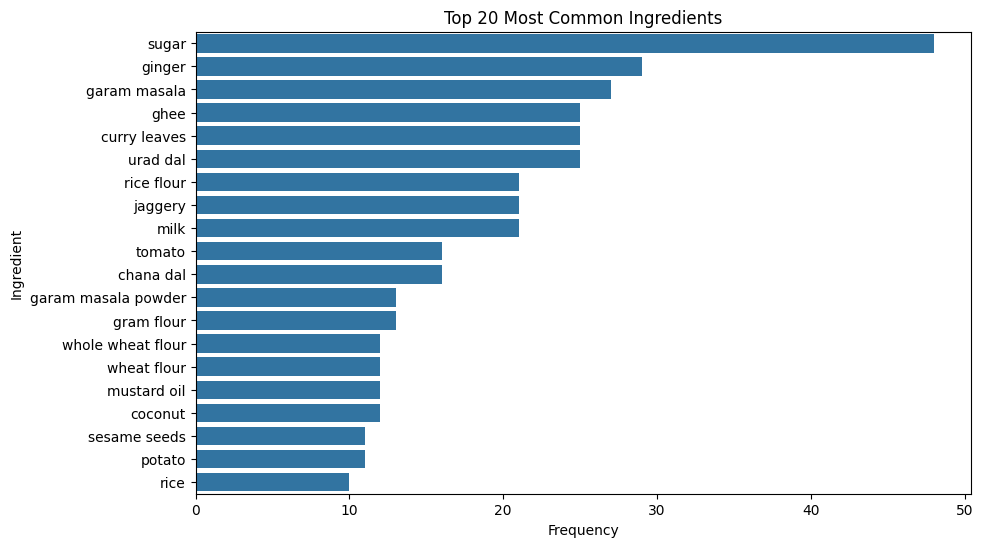

In [ ]:
#plotting the frequency of ingredients
all_ingredients = df['ingredients'].str.split(',\s*').explode()
all_ingredients = all_ingredients.str.strip().str.lower()
ingredient_counts = all_ingredients.value_counts()
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(x=ingredient_counts.head(top_n).values,
            y=ingredient_counts.head(top_n).index)
plt.title(f"Top {top_n} Most Common Ingredients")
plt.xlabel("Frequency")
plt.ylabel("Ingredient")
plt.show()

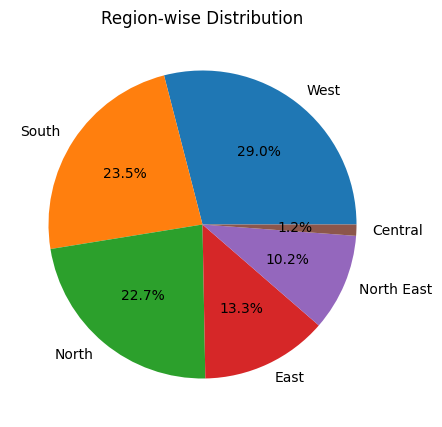

In [ ]:
region_counts = df['region'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(region_counts,
        labels=region_counts.index,
        autopct='%1.1f%%')
plt.title("Region-wise Distribution")
plt.show()

#Bivariate Analysis

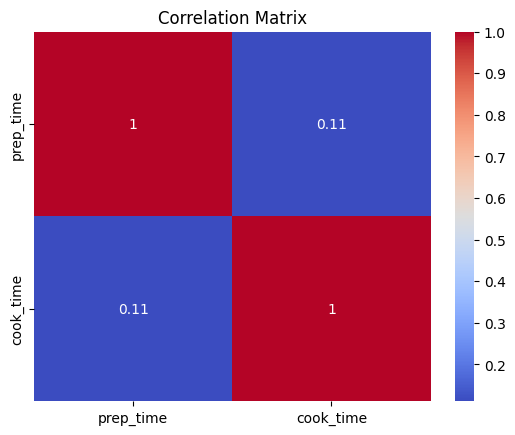

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

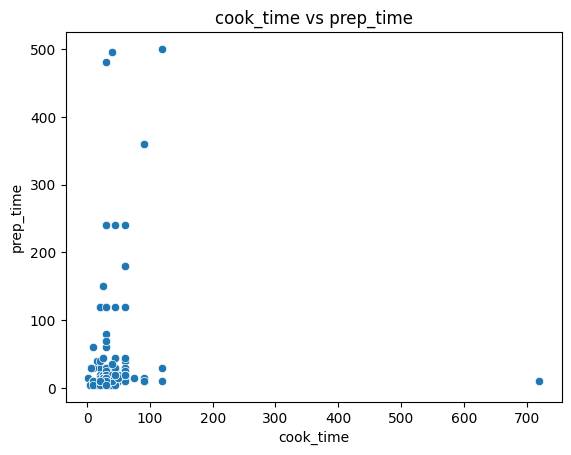

In [ ]:
sns.scatterplot(data=df, x='cook_time', y='prep_time')
plt.title("cook_time vs prep_time")
plt.show()

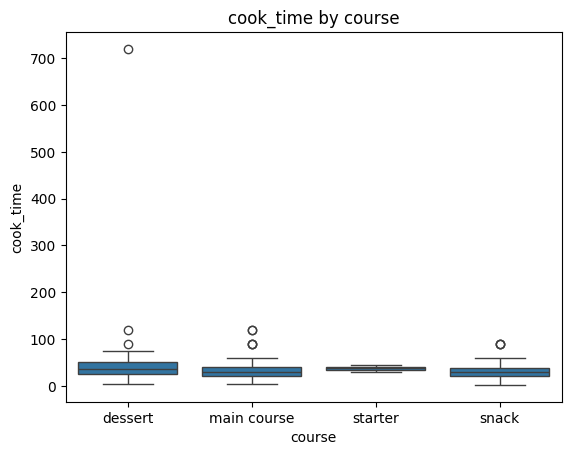

In [ ]:
sns.boxplot(x='course', y='cook_time', data=df)
plt.title("cook_time by course")
plt.show()

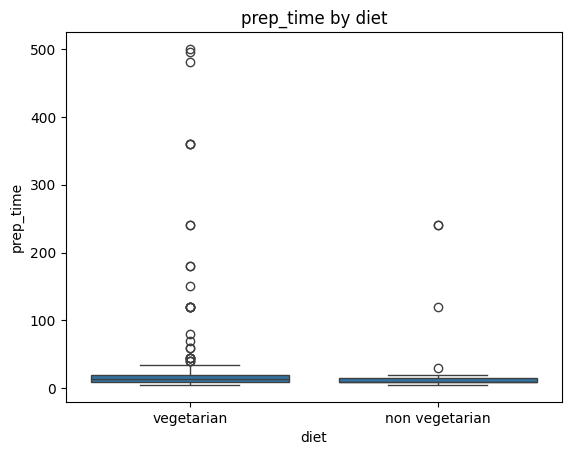

In [ ]:
sns.boxplot(x='diet', y='prep_time', data=df)
plt.title("prep_time by diet")
plt.show()

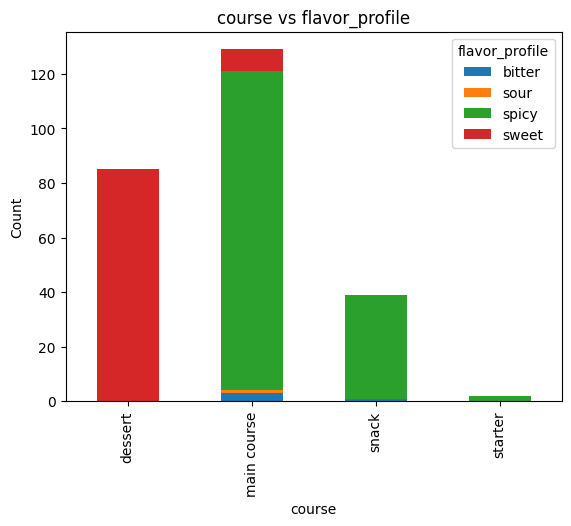

In [ ]:
ct = pd.crosstab(df['course'], df['flavor_profile'])
ct.plot(kind='bar', stacked=True)
plt.title("course vs flavor_profile")
plt.ylabel("Count")
plt.show()

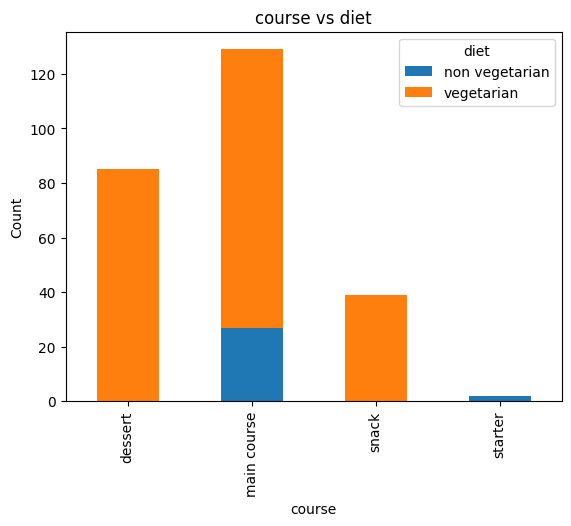

In [ ]:
ct = pd.crosstab(df['course'], df['diet'])
ct.plot(kind='bar', stacked=True)
plt.title("course vs diet")
plt.ylabel("Count")
plt.show()

# Multivariate Analysis

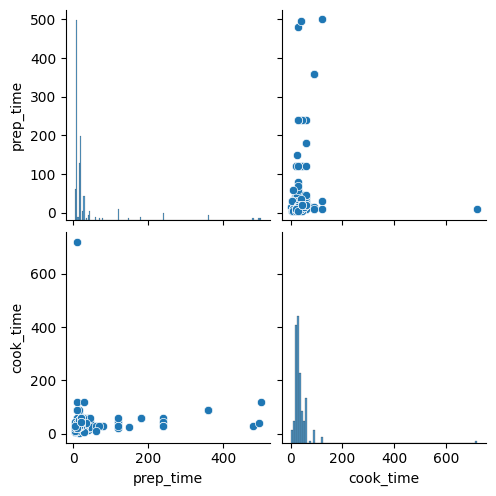

In [ ]:
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

# 1D Analysis

In [13]:
#skewness
print("Skewness:\n", df.skew(numeric_only=True))

Skewness:
 prep_time     4.640373
cook_time    12.290104
dtype: float64


In [70]:
#kurtosis
print("Kurtosis:\n", df.kurt(numeric_only=True))

Kurtosis:
 prep_time      23.110484
cook_time     177.491992
total_time     23.280082
cluster        11.253705
dtype: float64


In [14]:
#quantiles
print("\nQuantiles:\n", df.quantile([0.25, 0.5, 0.75], numeric_only=True))


Quantiles:
       prep_time  cook_time
0.25       10.0       20.0
0.50       12.0       30.0
0.75       20.0       45.0


In [69]:
#outliers
num_df = df.select_dtypes(include=['int64','float64'])

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_df < (Q1 - 1.5*IQR)) | (num_df > (Q3 + 1.5*IQR))).sum()
print("Outliers per numerical column:\n", outliers)

Outliers per numerical column:
 prep_time     31
cook_time     11
total_time    22
dtype: int64


In [18]:
#frequency distribution for numerical
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\nFrequency Distribution for {col}:")
    print(df[col].value_counts().head())


Frequency Distribution for prep_time:
prep_time
10.0    109
20.0     46
15.0     31
5.0      17
30.0     13
Name: count, dtype: int64

Frequency Distribution for cook_time:
cook_time
30.0    69
20.0    48
40.0    29
60.0    24
45.0    17
Name: count, dtype: int64


In [19]:
#frequency distribution for categorical
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nFrequency Distribution for {col}:")
    print(df[col].value_counts().head())


Frequency Distribution for name:
name
Balu shahi        1
Boondi            1
Gajar ka halwa    1
Ghevar            1
Gulab jamun       1
Name: count, dtype: int64

Frequency Distribution for ingredients:
ingredients
Gram flour, ghee, sugar                                                          2
Chhena, sugar, ghee                                                              2
Arbi ke patte, sesame seeds, gur, bengal gram flour, imli                        2
Carrots, milk, sugar, ghee, cashews, raisins                                     1
Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water    1
Name: count, dtype: int64

Frequency Distribution for diet:
diet
vegetarian        226
non vegetarian     29
Name: count, dtype: int64

Frequency Distribution for flavor_profile:
flavor_profile
spicy     157
sweet      93
bitter      4
sour        1
Name: count, dtype: int64

Frequency Distribution for course:
course
main course    129
dessert         85
snack     

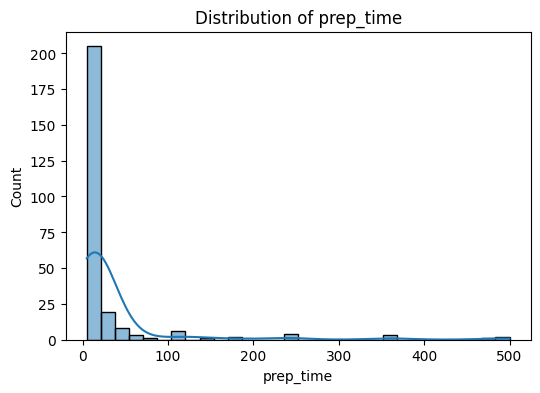

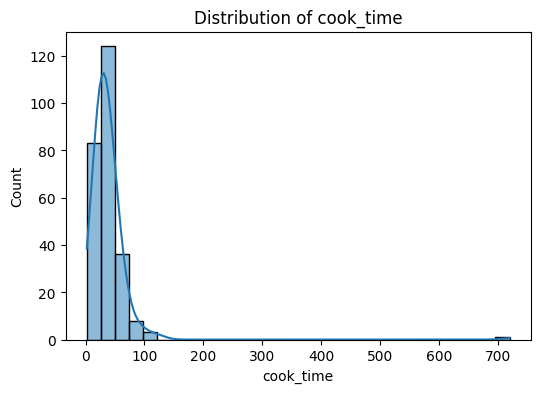

In [20]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# 2D analysis

*Numerical vs numerical*

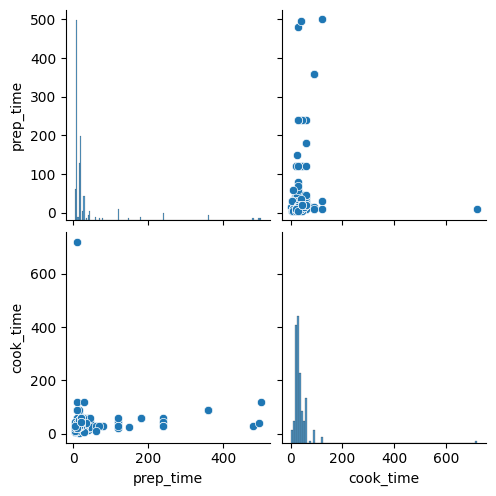

In [22]:
sns.pairplot(df.select_dtypes(include=['int64','float64']))
plt.show()

In [24]:
#correlation
print(df.corr(numeric_only=True))

           prep_time  cook_time
prep_time   1.000000   0.111391
cook_time   0.111391   1.000000


*Numerical vs Categorical*

In [28]:
#grouping regions by prep_time
print(df.groupby('region')['prep_time'].mean())

region
Central       13.333333
East          36.970588
North         35.000000
North East    21.153846
South         56.083333
West          16.918919
Name: prep_time, dtype: float64


In [27]:
print(df.groupby('flavor_profile')['cook_time'].median())

flavor_profile
bitter    35.0
sour      10.0
spicy     30.0
sweet     30.0
Name: cook_time, dtype: float64


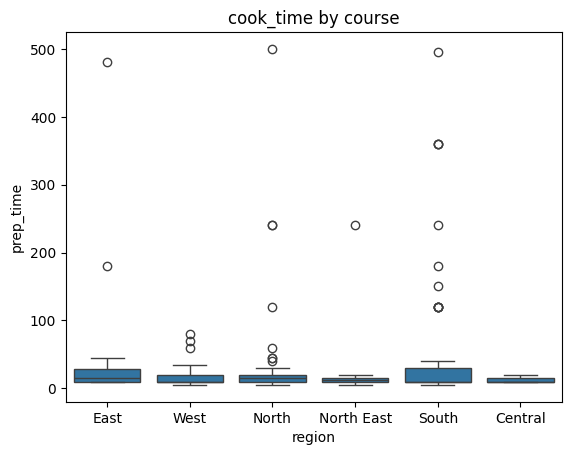

In [31]:
sns.boxplot(x='region', y='prep_time', data=df)
plt.title("cook_time by course")
plt.show()

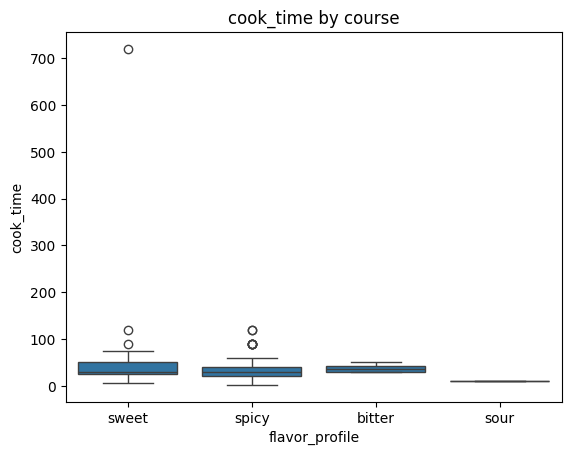

In [32]:
sns.boxplot(x='flavor_profile', y='cook_time', data=df)
plt.title("cook_time by course")
plt.show()

*Categorical vs Categorical*

In [34]:
#contingency table
cont_table = pd.crosstab(df['region'], df['course'])
print(cont_table)

course      dessert  main course  snack  starter
region                                          
Central           1            1      1        0
East             23           11      0        0
North            13           39      4        2
North East        7           19      0        0
South            18           31     11        0
West             23           28     23        0


In [35]:
# With proportions
cont_table_prop = pd.crosstab(df['region'], df['course'], normalize="index")
print(cont_table_prop)

course       dessert  main course     snack   starter
region                                               
Central     0.333333     0.333333  0.333333  0.000000
East        0.676471     0.323529  0.000000  0.000000
North       0.224138     0.672414  0.068966  0.034483
North East  0.269231     0.730769  0.000000  0.000000
South       0.300000     0.516667  0.183333  0.000000
West        0.310811     0.378378  0.310811  0.000000


In [37]:
#Chi-square test
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(cont_table)
print("Chi-square test p-value:", p)
print("Since p-value < 0.05, this implies the variables are related to each other.")

Chi-square test p-value: 8.196344727946633e-07
Since p-value < 0.05, this implies the variables are related to each other.


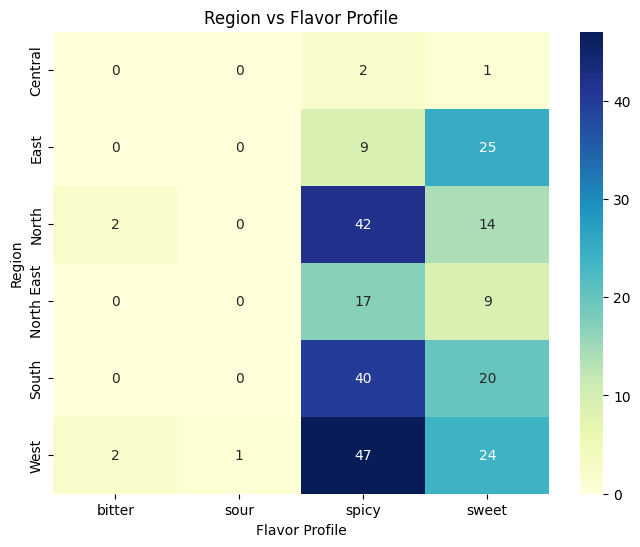

In [41]:
#heatmap for categorical variables
crosstab1 = pd.crosstab(df['region'], df['flavor_profile'])
plt.figure(figsize=(8,6))
sns.heatmap(crosstab1, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Region vs Flavor Profile")
plt.xlabel("Flavor Profile")
plt.ylabel("Region")
plt.show()

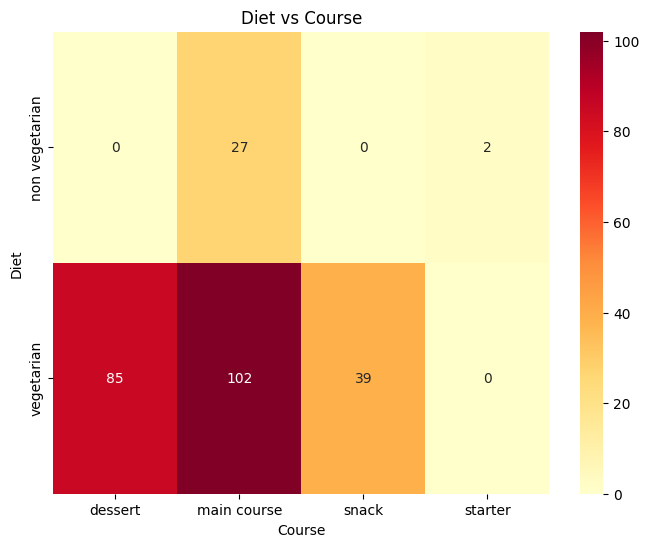

In [42]:
crosstab2 = pd.crosstab(df['diet'], df['course'])
plt.figure(figsize=(8,6))
sns.heatmap(crosstab2, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Diet vs Course")
plt.xlabel("Course")
plt.ylabel("Diet")
plt.show()

# 3D Analysis

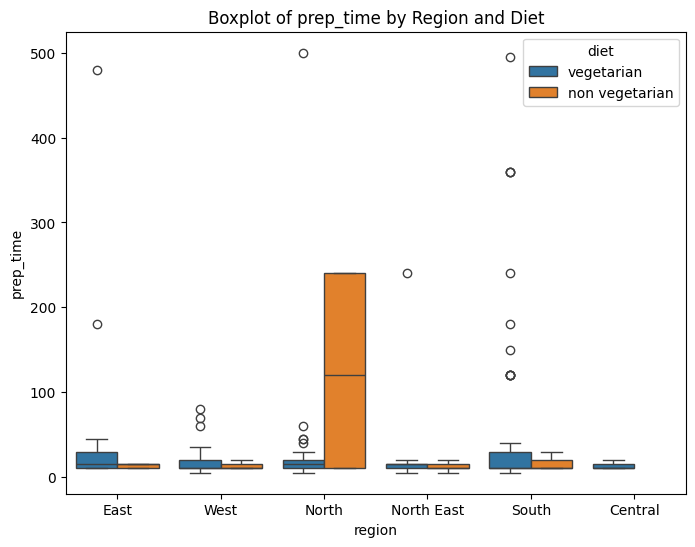

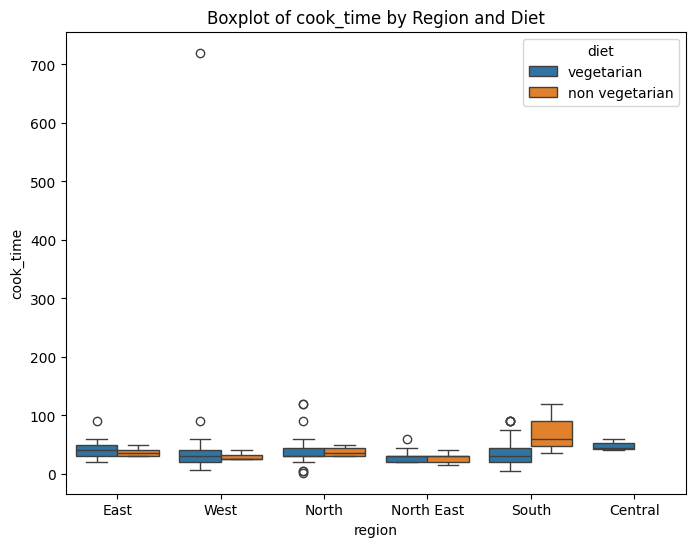

In [46]:
for num in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x="region", y=num, hue="diet", data=df)
    plt.title(f"Boxplot of {num} by Region and Diet")
    plt.show()


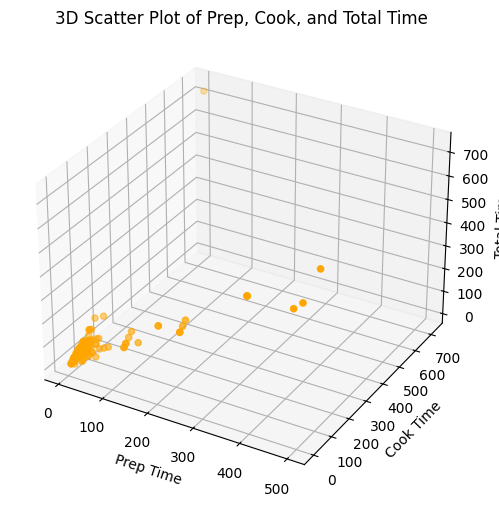

In [53]:
from mpl_toolkits.mplot3d import Axes3D

df['total_time'] = df['prep_time'] + df['cook_time']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['prep_time'], df['cook_time'], df['total_time'],
           c='orange', marker='o')

ax.set_xlabel("Prep Time")
ax.set_ylabel("Cook Time")
ax.set_zlabel("Total Time")
plt.title("3D Scatter Plot of Prep, Cook, and Total Time")
plt.show()


# K-means Clustering

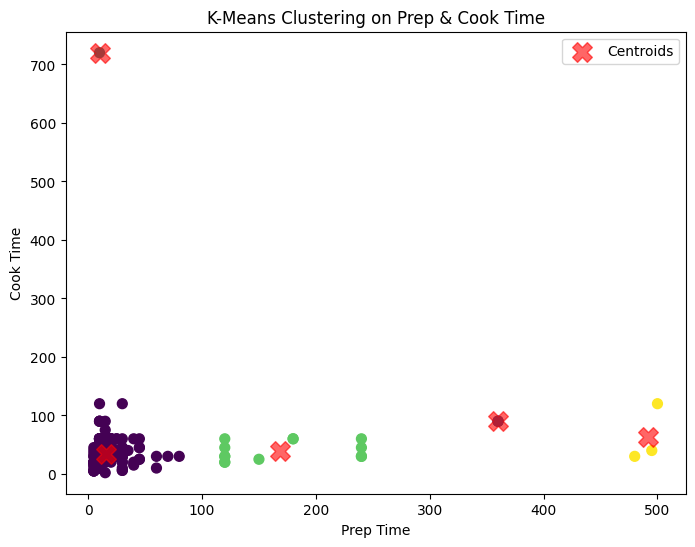

In [62]:
from sklearn.cluster import KMeans

X = df[['prep_time', 'cook_time']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(df['prep_time'], df['cook_time'], c=df['cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200, alpha=0.6, label='Centroids')

plt.xlabel("Prep Time")
plt.ylabel("Cook Time")
plt.title("K-Means Clustering on Prep & Cook Time")
plt.legend()
plt.show()